In [65]:
!pip3 install matplotlib

In [66]:
import matplotlib.pyplot as plt
import numpy as np

In [67]:
!pip install pandas

In [68]:
import pandas as pd

In [69]:
dataset = pd.read_csv("data/customer_data.csv")

In [70]:
dataset.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [71]:
y_axis = np.array(dataset["Review Rating"].values)
x_axis = np.array(dataset["Age"].values)

In [72]:
print(dataset["Location"].unique())

['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Michigan']


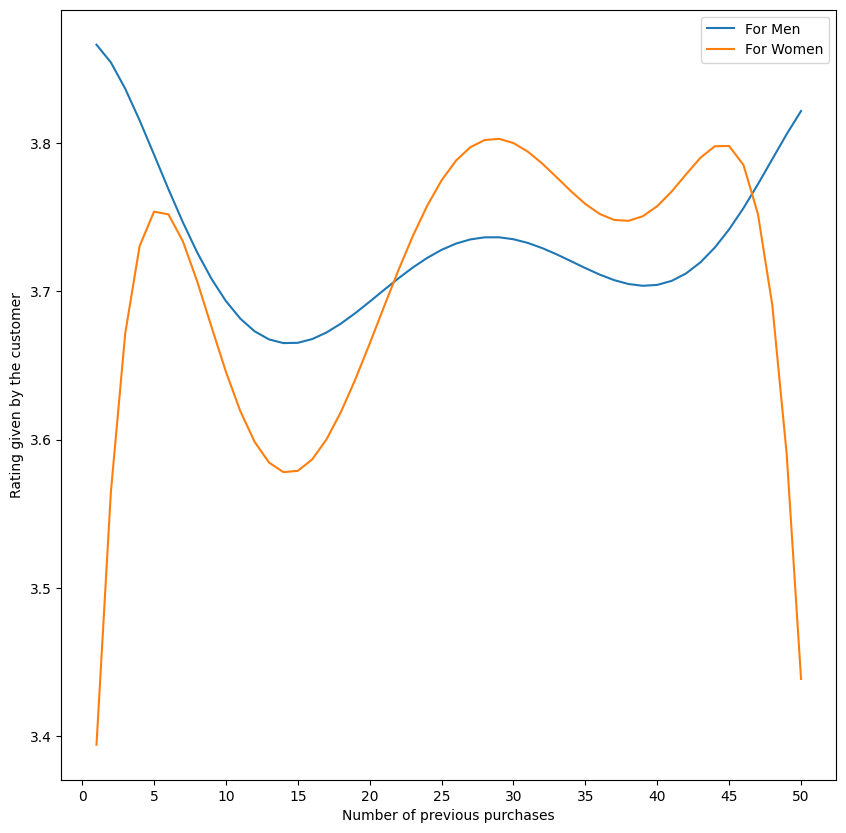

In [73]:
feature_category = "Clothing"
payment_method = "Credit Card"

clothing_y_axis_1 = dataset.loc[(dataset["Category"] == feature_category) & (dataset["Gender"] == "Male")]["Review Rating"]
clothing_x_axis_1 = dataset.loc[(dataset["Category"] == feature_category) & (dataset["Gender"] == "Male")]["Previous Purchases"]

clothing_y_axis_2 = dataset.loc[(dataset["Category"] == feature_category) & (dataset["Gender"] == "Female")]["Review Rating"]
clothing_x_axis_2 = dataset.loc[(dataset["Category"] == feature_category) & (dataset["Gender"] == "Female")]["Previous Purchases"]

function_for_cash = np.poly1d(np.polyfit(clothing_x_axis_1, clothing_y_axis_1, 6))
function_for_cash_1 = np.poly1d(np.polyfit(clothing_x_axis_2, clothing_y_axis_2, 6))

# dataset.loc[dataset["Category"] == "Clothing"]
plt.figure(figsize=(10, 10))
plt.xticks(np.arange(0, 71, 5))
# plt.plot(clothing_x_axis_1, clothing_y_axis_1, "bo")
# plt.plot(clothing_x_axis_2, clothing_y_axis_2, "r*")
plt.plot(np.unique(clothing_x_axis_1), function_for_cash(np.unique(clothing_x_axis_1)))
plt.plot(np.unique(clothing_x_axis_2), function_for_cash_1(np.unique(clothing_x_axis_2)))
plt.legend(["For Men", "For Women"])
plt.xlabel("Number of previous purchases")
plt.ylabel("Rating given by the customer")
plt.show()

In [74]:
dataset = dataset.rename(columns={
    "Age": "age",
    "Gender": "gender",
    "Item Purchased": "item_purchased",
    "Category": "category",
    "Purchase Amount (USD)": "puchase_amount",
    "Location": "location",
    "Size": "size",
    "Color": "color",
    "Season": "season",
    "Review Rating": "review_rating",
    "Subscription Status": "subscription_status",
    "Payment Method": "payment_method",
    "Shipping Type": "shipping_type",
    "Discount Applied": "discount_applied",
    "Promo Code Used": "promocode_used",
    "Previous Purchases": "previous_purchases",
    "Frequency of Purchases": "frequency_of_purchases"
})
dataset.pop("Customer ID")
dataset.pop("Preferred Payment Method")


0               Venmo
1                Cash
2         Credit Card
3              PayPal
4              PayPal
            ...      
3895            Venmo
3896    Bank Transfer
3897            Venmo
3898            Venmo
3899            Venmo
Name: Preferred Payment Method, Length: 3900, dtype: object

In [75]:
dataset.head()
dataset["frequency_of_purchases"].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [76]:
y_train = dataset.pop('review_rating')
NUMERIC_COLUMNS = ["age", "purchase_amount", "previous_purchases"]
CATEGORICAL_COLUMNS = ["gender", "item_purchased", "category", "location", "size", "color", "season", "subscription_status", "payment_method", "shipping_type", "discount_applied", "promocode_used", "frequency_of_purchases"]

In [79]:
import tensorflow as tf

In [ ]:
feature_columns = []

# TODO: Try to Keras preprocessing layer instead of categorical column with vocabulary list

for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dataset[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(key=feature_name, vocabulary_list=vocabulary))

In [82]:
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(key=feature_name, dtype=tf.float32))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [93]:
print(type(dict(dataset)))

<class 'dict'>
